# Related to figure 5m

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import numpy as np
from statannot import add_stat_annotation

df_group = pd.read_csv('/data/yuchen_data/Stereo_seq/All_Figures/Figure2/1.data/TLS_group.1125.txt', index_col=0, sep='\t')
dist_path = '/data/yuchen_data/Stereo_seq/All_Figures/Figure4/1.data/3.Distance_to_TLS/'
tangram_path = '/data/yuchen_data/Stereo_seq/All_Figures/Figure4/1.data/2.tangram_result/'
HCC_meta_path = "/data/yuchen_data/Stereo_seq/All_Figures/Figure4/1.data/HCC_metadata_Final/"

dic_tls_group = dict(zip(df_group.index, df_group.Group))

samplelist2 = ["ST2907T","ST2907B","ST2740P","ST2772B","ST2772P","ST2772T","ST2837B","ST2846B","ST2846P","ST2893B","ST2893P","ST2893T","ST2896P","ST2903B","ST2931B","ST2931P","ST2931T","ST2903P","ST2976T", "ST2976B"]

### scRNA-seq

In [2]:
######### 只选取Tumor的TLS以及Tumor区域的Bin
df_tls_location = pd.read_csv('/data/yuchen_data/Stereo_seq/All_Figures/Figure4/1.data/TLS_location_file_version3.csv', index_col=0, sep=',')
all_tumor_tls = df_tls_location.index[df_tls_location['location_Label2']=='T']

dist_mature_T = np.array([])
dist_immature_T = np.array([])

for sample in samplelist2:
    df_meta = pd.read_csv(f'{HCC_meta_path}/{sample}_metadata_final.txt', index_col=0, sep='\t')
    df_dist = pd.read_csv(f'{dist_path}/{sample}.distance.tls.txt', index_col=0, sep='\t')
    df_tangram = pd.read_csv(f'{tangram_path}/{sample}.tangram.Clustermode.rst.txt', index_col=0, sep='\t')
    c2_bins = df_tangram.index[df_tangram['Cluster'] == 'Cluster_2']
    tumor_region_bins = df_meta.index[~df_meta['Bin_Region'].isin(['B', 'P'])]
    used_bins = c2_bins.intersection(tumor_region_bins)

    sample_tls = df_meta.TLS_final.unique()
    used_tls = all_tumor_tls.intersection(sample_tls)
    if len(used_tls) > 0:
        df_dist_c2 = df_dist.loc[used_bins, used_tls]
        df_dist_c2 = df_dist_c2.T
        df_dist_c2['Group'] = df_dist_c2.index.map(dic_tls_group)
        if 'Mature' in list(df_dist_c2['Group']):
            dist_mature_cur = df_dist_c2[df_dist_c2['Group'] == 'Mature'].iloc[:, :-1].values.flatten()
            dist_mature_T = np.concatenate((dist_mature_T, dist_mature_cur))
        if 'NotMature' in list(df_dist_c2['Group']):
            dist_notmature_cur = df_dist_c2[df_dist_c2['Group'] == 'NotMature'].iloc[:, :-1].values.flatten()
            dist_immature_T = np.concatenate((dist_immature_T, dist_notmature_cur))

/tmp/ipykernel_5123/4184098786.py:9: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_meta = pd.read_csv(f'{HCC_meta_path}/{sample}_metadata_final.txt', index_col=0, sep='\t')
/tmp/ipykernel_5123/4184098786.py:9: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_meta = pd.read_csv(f'{HCC_meta_path}/{sample}_metadata_final.txt', index_col=0, sep='\t')
/tmp/ipykernel_5123/4184098786.py:9: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_meta = pd.read_csv(f'{HCC_meta_path}/{sample}_metadata_final.txt', index_col=0, sep='\t')
/tmp/ipykernel_5123/4184098786.py:9: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_meta = pd.read_csv(f'{HCC_meta_path}/{sample}_metadata_final.txt', index_col=0, sep='\t')
/tmp/ipykernel_5123/4184098786.py:9: DtypeWarning: Columns (9) have mixe

Mature v.s. Deviating: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=6.665e+10


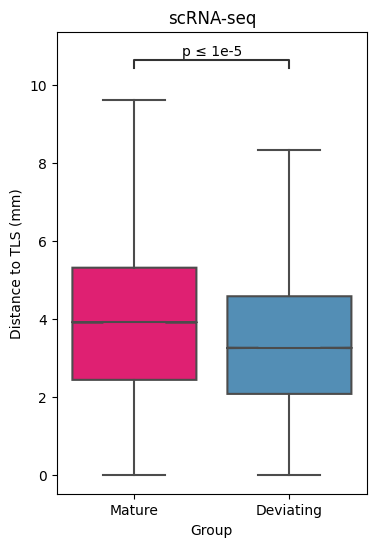

In [31]:
# boxplot
df_mature = pd.DataFrame(dist_mature_T, columns=['Dist'])
df_mature['Group'] = ['Mature'] * df_mature.shape[0]

df_immature = pd.DataFrame(dist_immature_T, columns=['Dist'])
df_immature['Group'] = ['Deviating'] * df_immature.shape[0]

df_plot_box = pd.concat((df_mature, df_immature))

df_plot_box['Dist'] = df_plot_box['Dist'] * 25 / 1000

plt.figure(figsize=(4, 6))
# sns.violinplot(data=df_plot_box, x="Group", y="Dist", order=['Mature', 'Deviating'], palette={'Mature': '#FF006E', 'Conforming': '#9D4EDD', 'Deviating':'#4292c6'}, inner=None)
ax = sns.boxplot(data=df_plot_box, x="Group", y="Dist", order=['Mature', 'Deviating'], palette={'Mature': '#FF006E', 'Conforming': '#9D4EDD', 'Deviating':'#4292c6'}, showfliers=False, notch=True)
ax.set_title('scRNA-seq')
ax.set_ylabel('Distance to TLS (mm)')
add_stat_annotation(ax, data=df_plot_box, x="Group", y="Dist", order=['Mature', 'Deviating'], 
                        box_pairs=[("Mature", "Deviating")],
                        test='Mann-Whitney', text_format='simple', loc='inside', verbose=2)
plt.show()

### scATAC-seq

In [32]:
tangram_path = '/data/yuchen_data/Stereo_seq/All_Figures/Figure4/1.data/5.tangram_result_scATAC/'

In [33]:
samplelist_used = ['ST2837B', 'ST2893T', 'ST2907T', 'ST2976T']

dist_mature = np.array([])
dist_immature = np.array([])
######### 只选取Tumor的TLS以及Tumor区域的Bin
dist_mature_T = np.array([])
dist_immature_T = np.array([])

for sample in samplelist_used:
    df_meta = pd.read_csv(f'{HCC_meta_path}/{sample}_metadata_final.txt', index_col=0, sep='\t')
    df_dist = pd.read_csv(f'{dist_path}/{sample}.distance.tls.txt', index_col=0, sep='\t')
    df_tangram = pd.read_csv(f'{tangram_path}/{sample}.tangram.Clustermode.rst.txt', index_col=0, sep='\t')
    c2_bins = df_tangram.index[df_tangram['Cluster'] == 'High']
    tumor_region_bins = df_meta.index[~df_meta['Bin_Region'].isin(['B', 'P'])]
    used_bins = c2_bins.intersection(tumor_region_bins)

    sample_tls = df_meta.TLS_final.unique()
    used_tls = all_tumor_tls.intersection(sample_tls)
    if len(used_tls) > 0:
        df_dist_c2 = df_dist.loc[used_bins, used_tls]
        df_dist_c2 = df_dist_c2.T
        df_dist_c2['Group'] = df_dist_c2.index.map(dic_tls_group)
        if 'Mature' in list(df_dist_c2['Group']):
            dist_mature_cur = df_dist_c2[df_dist_c2['Group'] == 'Mature'].iloc[:, :-1].values.flatten()
            dist_mature_T = np.concatenate((dist_mature_T, dist_mature_cur))
        if 'NotMature' in list(df_dist_c2['Group']):
            dist_notmature_cur = df_dist_c2[df_dist_c2['Group'] == 'NotMature'].iloc[:, :-1].values.flatten()
            dist_immature_T = np.concatenate((dist_immature_T, dist_notmature_cur))

/tmp/ipykernel_5123/516488858.py:10: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_meta = pd.read_csv(f'{HCC_meta_path}/{sample}_metadata_final.txt', index_col=0, sep='\t')


Mature v.s. Deviating: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=6.747e+10


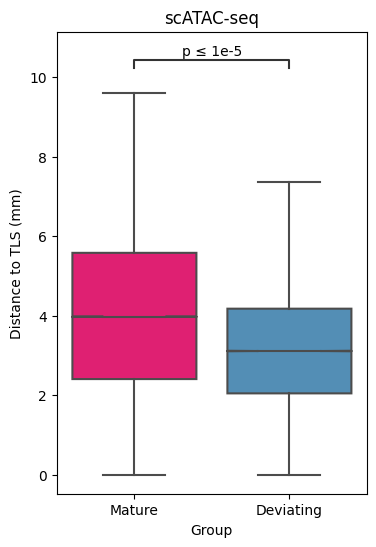

In [35]:
df_mature = pd.DataFrame(dist_mature_T, columns=['Dist'])
df_mature['Group'] = ['Mature'] * df_mature.shape[0]

df_immature = pd.DataFrame(dist_immature_T, columns=['Dist'])
df_immature['Group'] = ['Deviating'] * df_immature.shape[0]

df_plot_box = pd.concat((df_mature, df_immature))
df_plot_box['Dist'] = df_plot_box['Dist'] * 25 / 1000

plt.figure(figsize=(4, 6))
# sns.violinplot(data=df_plot_box, x="Group", y="Dist", order=['Mature', 'Deviating'], palette={'Mature': '#FF006E', 'Conforming': '#9D4EDD', 'Deviating':'#4292c6'}, inner=None)
ax = sns.boxplot(data=df_plot_box, x="Group", y="Dist", order=['Mature', 'Deviating'], palette={'Mature': '#FF006E', 'Conforming': '#9D4EDD', 'Deviating':'#4292c6'}, showfliers=False, notch=True)
ax.set_title('scATAC-seq')
ax.set_ylabel('Distance to TLS (mm)')
add_stat_annotation(ax, data=df_plot_box, x="Group", y="Dist", order=['Mature', 'Deviating'], 
                        box_pairs=[("Mature", "Deviating")],
                        test='Mann-Whitney', text_format='simple', loc='inside', verbose=2)
plt.show()